In [33]:
import torch
print(torch.__version__)

2.0.0+cpu


In [34]:
torch.cuda.is_available()

False

In [35]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

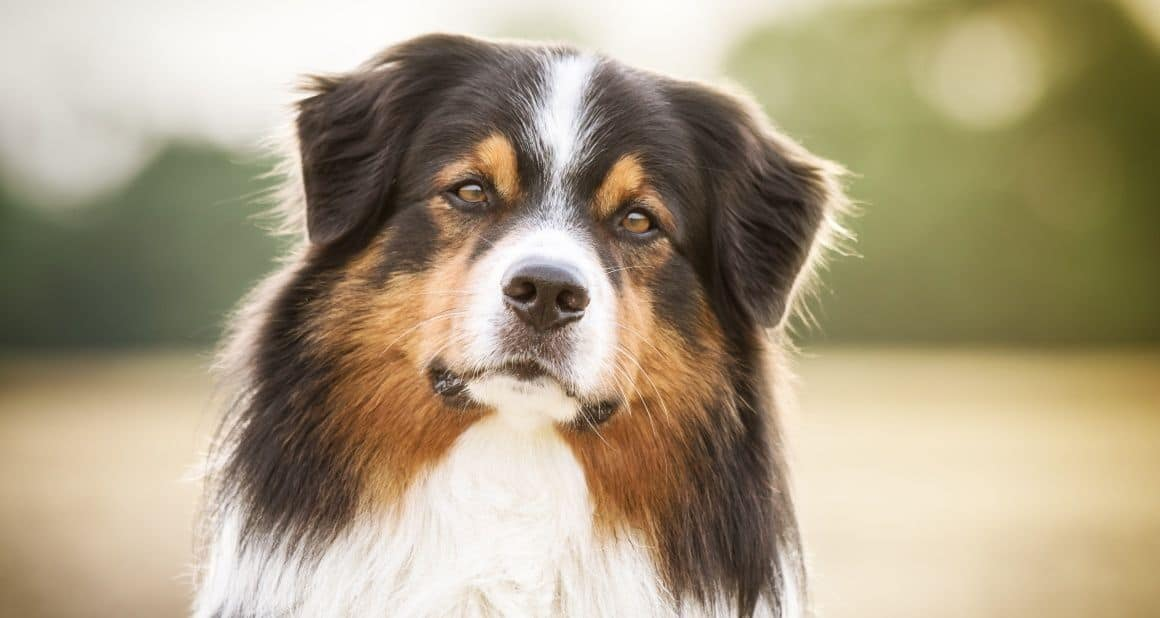

In [36]:
from PIL import Image
img = Image.open("hund.jpeg")
img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


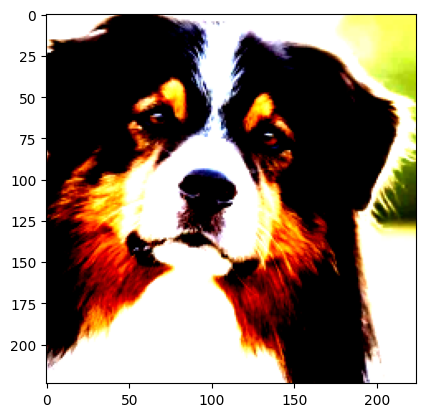

In [37]:
from torchvision import transforms
import matplotlib.pyplot as plt

preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])

img_t = preprocess(img)
img_t.shape
#plt.imshow(img_t)
plt.imshow(img_t.permute(1,2,0))


In [38]:
resnet = models.resnet101(pretrained=True)
alexnet = models.AlexNet()
batch_t= torch.unsqueeze(img_t, 0)

In [39]:


# classification with ResNET
resnet.eval()
out = resnet(batch_t)
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
# give the best possible outcome
labels[index[0]], percentage[index[0]].item()
# give all possible outcomes
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]



In [40]:
alexnet.eval()
out = alexnet(batch_t)
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
# give the best possible outcome
labels[index[0]], percentage[index[0]].item()
# give all possible outcomes
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('collie', 71.69398498535156),
 ('Border collie', 9.032013893127441),
 ('Shetland sheepdog, Shetland sheep dog, Shetland', 7.589488506317139),
 ('Bernese mountain dog', 5.5956525802612305),
 ('Appenzeller', 3.0208656787872314)]